In [1]:
import pandas as pd

from mkt.ml.models.factor_model import TensorFactorPipeline

In [2]:
df_factor = pd.read_csv("/data1/tanseyw/projects/whitej/missense-kinase-toolkit/data/mskimpact_treatment_factor.csv")

In [3]:
tensor_factor_pipeline = TensorFactorPipeline(df=df_factor, D=10, epochs=1000)

Initializing TensorFactorPipeline...
Generating train/validation split...
    Tensor dimensions: I=84, J=85, K=337
Initializing model with D=10 latent factors...
    Optimizer: Adam, LR=0.01
Creating dataloaders...

DATA DIAGNOSTICS
Target column: p(drug|mut)
  Range: [0.0000, 1.0000]
  Mean: 0.0025
  Std: 0.0403

Split sizes:
  Train: 1036566 (79.1%)
  Val:   274027 (20.9%)
  ✓ No overlap between train and val

Model parameters:
  W: shape=torch.Size([84, 10]), mean=-0.0038, std=0.0977
  V: shape=torch.Size([85, 10]), mean=0.0005, std=0.1002
  U: shape=torch.Size([337, 10]), mean=-0.0012, std=0.0985

Initial prediction at (0,0,0): 0.4988



In [4]:
train_losses, test_losses = tensor_factor_pipeline.train()

Starting training: 1,036,566 train samples, 274,027 validation samples


Training epochs:   0%|                                                                                      | 1/1000 [00:00<02:45,  6.03it/s]

Epoch 0: Train Loss = 0.693149, Val Loss = 0.693152


Training epochs:   0%|▎                                                                                     | 3/1000 [00:00<01:39, 10.00it/s]

Epoch 1: Train Loss = 0.693148, Val Loss = 0.693150
Epoch 2: Train Loss = 0.693147, Val Loss = 0.693149
  ⚠️  WARNING: Loss not changing - model may not be learning!
Epoch 3: Train Loss = 0.693147, Val Loss = 0.693148
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:   0%|▍                                                                                     | 5/1000 [00:00<01:28, 11.25it/s]

Epoch 4: Train Loss = 0.693147, Val Loss = 0.693148
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  10%|████████▋                                                                           | 103/1000 [00:07<00:58, 15.33it/s]

Epoch 100: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  20%|█████████████████                                                                   | 203/1000 [00:13<00:53, 14.86it/s]

Epoch 200: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  30%|█████████████████████████▍                                                          | 303/1000 [00:22<00:55, 12.50it/s]

Epoch 300: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  40%|█████████████████████████████████▊                                                  | 403/1000 [00:29<00:38, 15.55it/s]

Epoch 400: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  50%|██████████████████████████████████████████                                          | 501/1000 [00:38<01:57,  4.24it/s]

Epoch 500: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  60%|██████████████████████████████████████████████████▍                                 | 601/1000 [01:04<01:42,  3.88it/s]

Epoch 600: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  70%|███████████████████████████████████████████████████████████                         | 703/1000 [01:18<00:27, 10.66it/s]

Epoch 700: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  80%|███████████████████████████████████████████████████████████████████▍                | 803/1000 [01:28<00:18, 10.67it/s]

Epoch 800: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs:  90%|███████████████████████████████████████████████████████████████████████████▊        | 903/1000 [01:37<00:08, 10.89it/s]

Epoch 900: Train Loss = 0.693147, Val Loss = 0.693147
  ⚠️  WARNING: Loss not changing - model may not be learning!


Training epochs: 100%|███████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:44<00:00,  9.54it/s]


In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [19]:
min(test_losses)

0.6931471228599548

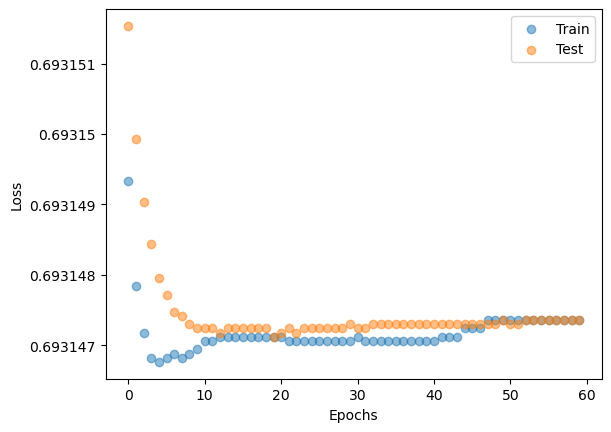

In [25]:
end = 60
plt.scatter(x=range(len(train_losses[:end])), y=train_losses[:end], alpha=0.5, label="Train");
plt.scatter(x=range(len(test_losses[:end])), y=test_losses[:end], alpha=0.5, label="Test");
plt.legend(loc='upper right');

ax = plt.gca()
formatter = StrMethodFormatter('{x:.6g}')
ax.yaxis.set_major_formatter(formatter)

plt.xlabel("Epochs");
plt.ylabel("Loss");

In [26]:
tensor_factor_pipeline.df.head()

,hgnc,klifs,drug,hgnc_idx,klifs_idx,drug_idx,val,p(drug|mut)
0,ERBB3,VI:65,Cytarabine,0,0,0,True,0.0
1,CHEK2,αD:54,Inotuzumab Ozogamicin,1,1,1,True,0.0
2,MAP3K1,αD:58,Aflibercept Ophthalmic,2,2,2,True,0.0
3,MTOR,c.l:68,Lutetium Lu-177 Dotatate,3,3,3,True,0.0
4,IGF1R,xDFG:80,Polatuzumab Vedotin,4,4,4,True,0.0


In [30]:
tensor_factor_pipeline.df["p(drug|mut)"].max()

1.0

In [36]:
from tqdm import tqdm

In [39]:
list_drug_cutoff = []
for drug in tqdm(tensor_factor_pipeline.df["drug"].unique(), desc="Looping over drugs"):
    if all(tensor_factor_pipeline.df.loc[tensor_factor_pipeline.df["drug"] == drug, "p(drug|mut)"] < 0.05):
        list_drug_cutoff.append(drug)

Looping over drugs: 100%|██████████████████████████████████████████████████████████████████████████████████| 337/337 [00:18<00:00, 17.91it/s]


In [44]:
sum(tensor_factor_pipeline.df["p(drug|mut)"] == 0) / tensor_factor_pipeline.df.shape[0]

0.9928520906185215

In [41]:
len(list_drug_cutoff)

110

In [42]:
tensor_factor_pipeline.df["drug"].nunique()

337

In [ ]:
tensor_factor_pipeline.df["p(drug|mut)"]

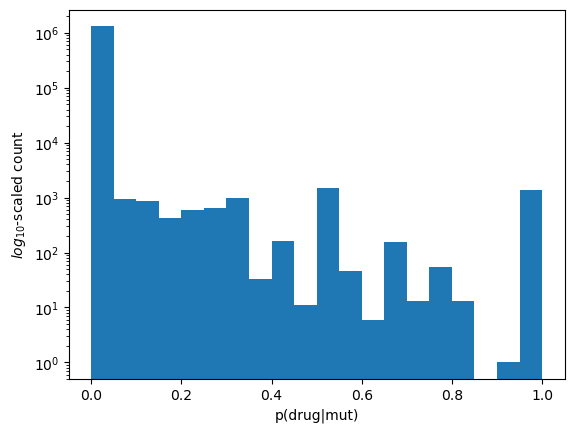

In [34]:
plt.hist(tensor_factor_pipeline.df["p(drug|mut)"], bins=20);
plt.yscale("log");
plt.xlabel("p(drug|mut)");
plt.ylabel("$log_{10}$-scaled count");

In [27]:
tensor_factor_pipeline.df["drug"].unique()

array(['Cytarabine', 'Inotuzumab Ozogamicin', 'Aflibercept Ophthalmic',
       'Lutetium Lu-177 Dotatate', 'Polatuzumab Vedotin',
       'Mitomycin Ophthalmic', 'Rociletinib', 'Selinexor', 'Infigratinib',
       'Histrelin', 'Toremifene', 'Idarubicin', 'Enfortumab Vedotin',
       'Gp100', 'Valrubicin', 'Nivolumab', 'Tafasitamab', 'Mitomycin',
       'Lapatinib', 'Dabrafenib', 'Tivozanib', 'Bexarotene',
       'Selpercatinib', 'Lurbinectedin', 'Ivosidenib', 'Chlorambucil',
       'Hyaluronidase/Pertuzumab/Trastuzumab', 'Sodium Iodide I-131 3F8',
       'Azacitidine', 'Lutetium Lu-177 Dota-Jr11', 'Encorafenib',
       'Hyaluronidase-Trastuzumab', 'Cisplatin',
       "Cu64 Nota-Psmai-Peg-Cy55-C' Dots", 'Pemetrexed',
       'Ciltacabtagene Autoleucel', 'Bleomycin', 'Arsenic Trioxide',
       'Necitumumab', 'Naxitamab', 'Elotuzumab', 'Abemaciclib',
       'Lutetium Lu-177 Edotreotide', 'Cedazuridine-Decitabine',
       'Irinotecan', 'Bcg', 'Altretamine', 'Dinutuximab', 'Isatuximab',
      

In [11]:
tensor_factor_pipeline.model.V

Parameter containing:
tensor([[-2.0017e-25,  4.8648e-25,  1.9672e-25,  ..., -6.3334e-25,
         -1.1322e-24, -1.4103e-25],
        [-1.9073e-25,  7.8164e-25, -3.9244e-25,  ...,  1.4551e-24,
          1.5207e-24, -4.0805e-25],
        [-1.3912e-24,  9.7853e-25, -2.9583e-24,  ..., -1.5145e-24,
          1.1226e-24,  1.2671e-25],
        ...,
        [-3.5381e-25, -1.7221e-25, -4.8308e-24,  ..., -3.8674e-26,
          1.1426e-25, -1.7178e-24],
        [-4.9537e-26,  1.0638e-24, -7.8400e-25,  ..., -6.8141e-25,
          4.9666e-25,  3.9378e-25],
        [ 1.7079e-25,  1.2965e-24, -3.3924e-26,  ..., -9.6257e-25,
         -4.9819e-25,  1.0802e-24]], requires_grad=True)

In [9]:
dir(tensor_factor_pipeline.model)

['D',
 'I',
 'J',
 'K',
 'T_destination',
 'U',
 'V',
 'W',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_na

In [12]:
tensor_factor_pipeline.dataloader_trainings

LogisticTensorFactorModel()

In [10]:
dir(tensor_factor_pipeline.training_loader)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']

In [141]:
list_dims = [1, 2, 3]

In [144]:
i, j, k = [1, 2, 3]

In [145]:
i

1

In [136]:
def generate_split_dataframe(
    df_in: pd.DataFrame, 
    percent_split: float = 0.2,
    list_cols: list[str] = ["hgnc", "klifs", "drug"],
    str_y: str = "p(drug|mut)",
    seed: int = 42,
) -> tuple[pd.DataFrame, dict]:
    """Shuffle dataframe and create 80-20 train-test split with contiguous 3D blocks.
    
    For 3D tensor cross-validation, each test set is a contiguous cuboid
    representing approximately percent_split of the total volume.
    
    Parameters
    ----------
    df_in: pd.DataFrame
        Dataframe to annotate with splits.
    percent_split: float
        Percent held-out test.
    list_cols: list[str]
        Column names for the three dimensions.
    str_y: str
        Target column name.
    seed: int
        Seed for shuffling; default: 42.

    Returns
    -------
    tuple[pd.DataFrame, dict]
        Annotated dataframe and dictionary with split info.
    """
    df_split = df_in.sample(frac=1, random_state=seed).reset_index(drop=True).copy()
    dim_frac = percent_split ** (1/3)

    dict_splits = {}
    for col_name, col_series in df_split[list_cols].items():
        n_unique, series_unique = col_series.nunique(), col_series.unique()
        idx_end = max(1, int(np.round(dim_frac * n_unique)))
        dict_splits[col_name] = {
            "dict_map": dict(zip(range(n_unique), series_unique)),
            "list_idx": list(np.arange(n_unique)[0:idx_end])
        }

    for col in list_cols:
        dict_reverse = {v: k for k, v in dict_splits[col]["dict_map"].items()}
        df_split[col + "_idx"] = df_split[col].apply(lambda x: dict_reverse[x])
    df_split["test"] = np.logical_and.reduce(
        [df_split[k].isin([v["dict_map"][i] for i in v["list_idx"]]) for k, v in dict_splits.items()])
    df_split.insert(len(df_split.columns)-1, str_y, df_split.pop(str_y))

    return df_split, dict_splits

In [137]:
df_split, dict_splits = generate_split_dataframe(df_factor, seed=24)

In [138]:
df_split.head()

,hgnc,klifs,drug,hgnc_idx,klifs_idx,drug_idx,test,p(drug|mut)
0,ERBB3,VI:65,Cytarabine,0,0,0,True,0.0
1,CHEK2,αD:54,Inotuzumab Ozogamicin,1,1,1,True,0.0
2,MAP3K1,αD:58,Aflibercept Ophthalmic,2,2,2,True,0.0
3,MTOR,c.l:68,Lutetium Lu-177 Dotatate,3,3,3,True,0.0
4,IGF1R,xDFG:80,Polatuzumab Vedotin,4,4,4,True,0.0


In [140]:
df_split["test"].sum()/ df_split.shape[0]

0.2090862685822372

In [81]:
df_split["klifs_idx"].isin(np.arange(n_unique)[0:idx_end])

0           True
1           True
2           True
3           True
4           True
           ...  
1310588     True
1310589    False
1310590     True
1310591    False
1310592    False
Name: klifs_idx, Length: 1310593, dtype: bool

In [63]:
def generate_split_dataframe(
    df_in: pd.DataFrame, 
    seed: int = 42,
    list_cols: list[str] = ["hgnc", "klifs", "drug"],
    str_y: str = "p(drug|mut)",
    percent_split: float = 0.2,
) -> tuple[pd.DataFrame, dict]:
    """Shuffle dataframe and create 80-20 train-test split with contiguous 3D blocks.
    
    For 3D tensor cross-validation, each test set is a contiguous cuboid
    representing approximately percent_split of the total volume.
    
    Parameters
    ----------
    df_in: pd.DataFrame
        Dataframe to annotate with splits.
    seed: int
        Seed for shuffling; default: 42.
    list_cols: list[str]
        Column names for the three dimensions.
    str_y: str
        Target column name.
    percent_split: float
        Percent held-out test.

    Returns
    -------
    tuple[pd.DataFrame, dict]
        Annotated dataframe and dictionary with split info.
    """
    df_shuffled = df_in.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    # calculate the fraction of each dimension to hold out
    # each test set should be ~percent_split of total volume
    dim_fraction = (percent_split) ** (1/3)
    
    dict_splits = {}    
    for col_name, col_series in df_shuffled[list_cols].items():
        n_unique, series_unique = col_series.nunique(), col_series.unique()
        
        # calculate size of test block for this dimension
        test_size = max(1, int(np.round(n_unique * dim_fraction)))
        
        # create contiguous splits
        indices = np.arange(n_unique)
        
        # calculate start position for this fold's test set
        end = min(test_size, n_unique)
        list_train
        list_split_orig.append(indices[0:end])
        list_split_orig.append(indices[end:])

        dict_splits[col_name] = {
            "dict_map": dict(zip(range(n_unique), series_unique)),
            "list_train": list_train,            
        }
        
        dict(zip(range(n_unique), series_unique))
        # dict_splits[col_name] = {
        #     "dict_map": dict(zip(range(n_unique), series_unique)),
        #     "dict_splits": dict(zip(["test", "train"], list_split_orig)),
        #     "test_size": test_size,
        #     "n_unique": n_unique,
        # }
    
    # generate dataframe with indices
    df_new = df_shuffled[list_cols].copy()

    
    for col in df_new.columns:
        dict_reverse = {v: k for k, v in dict_splits[col]["dict_map"].items()}
        df_new[col] = df_new[col].map(dict_reverse)
    df_new.columns = df_new.columns + "_idx"
    df_split = pd.concat([df_shuffled, df_new], axis=1)

    # list_bool = []
    # for col in list_cols:
    #     series = df_split[col + "_idx"].isin(dict_splits[col]["dict_splits"]["train"])
    # np.logical_and(*list_bool)    
    # df_split["split"] = 

    df_split.insert(len(df_split.columns)-1, str_y, df_split.pop(str_y))
    
    return df_split, dict_splits

In [64]:
df_split, dict_folds = generate_split_dataframe(df_factor)

In [183]:
def generate_cv_dataframe(
    df_in: pd.DataFrame, 
    seed: int = 42,
    list_cols: list[str] = ["hgnc", "klifs", "drug"],
    str_y: str = "p(drug|mut)",
    n_split: int = 5,
) -> tuple[pd.DataFrame, dict]:
    """Shuffle dataframe and create 5-fold CV splits with contiguous 3D blocks.
    
    For 3D tensor cross-validation, each test set is a contiguous cuboid
    representing approximately 1/n_split of the total volume.
    
    Parameters
    ----------
    df_in: pd.DataFrame
        Dataframe to annotate with splits.
    seed: int
        Seed for shuffling; default: 42.
    list_cols: list[str]
        Column names for the three dimensions.
    str_y: str
        Target column name.
    n_split: int
        Number of cross-validation folds.

    Returns
    -------
    tuple[pd.DataFrame, dict]
        Annotated dataframe and dictionary with split info.
    """
    df_shuffled = df_in.sample(frac=1, random_state=seed).reset_index(drop=True)
    
    # calculate the fraction of each dimension to hold out
    # for n_split folds, each test set should be ~1/n_split of total volume
    dim_fraction = (1.0 / n_split) ** (1/3)
    
    dict_folds = {}
    
    for col_name, col_series in df_shuffled[list_cols].items():
        n_unique = col_series.nunique()
        series_unique = col_series.unique()
        
        # calculate size of test block for this dimension
        test_size = max(1, int(np.round(n_unique * dim_fraction)))
        
        # create contiguous splits
        list_split_orig = []
        indices = np.arange(n_unique)
        
        for i in range(n_split):
            # calculate start position for this fold's test set
            start = int(i * n_unique / n_split)
            end = min(start + test_size, n_unique)
            list_split_orig.append(indices[start:end])
        
        dict_folds[col_name] = {
            "dict_map": dict(zip(range(n_unique), series_unique)),
            "dict_splits": dict(zip(range(n_split), list_split_orig)),
            "test_size": test_size,
            "n_unique": n_unique,
        }
    
    # Generate dataframe with indices
    df_new = df_shuffled[list_cols].copy()
    for col in df_new.columns:
        dict_reverse = {v: k for k, v in dict_folds[col]["dict_map"].items()}
        df_new[col] = df_new[col].map(dict_reverse)
    df_new.columns = df_new.columns + "_idx"
    
    df_split = pd.concat([df_shuffled, df_new], axis=1)
    df_split.insert(len(df_split.columns)-1, str_y, df_split.pop(str_y))
    
    return df_split, dict_folds

In [ ]:
# ORIGINAL
def generate_split_dataframe(
    df_in: pd.DataFrame, 
    seed: int = 42,
    list_cols: list[str] = ["hgnc", "klifs", "drug"],
    str_y: str = "p(drug|mut)",
    n_split: int = 5,
) -> tuple[pd.DataFrame, dict]:
    """Shuffle dataframe, split on 

    Parameters
    ----------
    df_in: pd.DataFrame
        Dataframe to annotate with splits.
    seed: int
        Seed for shuffling; default: 42.

    Returns
    -------
    tuple[pd.DataFrame, dict]
        Annotated dataframe and dictionary with split info.
    """
    df_shuffled = df_in.sample(frac=1, random_state=seed).reset_index(drop=True)

    dict_folds = {}
    for idx, (col_name, col_series) in enumerate(df_shuffled[list_cols].items()):
        list_nunique = list(range(col_series.nunique()))
        series_unique = col_series.unique()

        list_split_orig = np.array_split(np.array(range(col_series.nunique())), n_split)
        idx_rearrange = [i for i in range(idx, n_split)] + [i for i in range(idx)]
        list_split_rearrange = [list_split_orig[i] for i in idx_rearrange]

        dict_folds[col_name] = {
            "dict_map": dict(zip(list_nunique, series_unique)),
            "dict_splits": dict(zip(list(range(n_split)), list_split_rearrange)),
        }

    # generate dataframe with idxs
    df_new = df_shuffled[list_cols].copy()
    for col in df_new.columns:
        dict_reverse = {v: k for k, v in dict_folds[col]["dict_map"].items()}
        df_new[col] = df_new[col].map(dict_reverse)
    df_new.columns = df_new.columns + "_idx"

    df_split = pd.concat([df_shuffled, df_new], axis=1)
    df_split.insert(len(df_split.columns)-1, str_y, df_split.pop(str_y))

    return df_split, dict_folds

In [163]:
df_factor.head()

,hgnc,klifs,drug,p(drug|mut)
0,EGFR,a.l:84,Leucovorin,0.003254
1,EGFR,a.l:84,Enfortumab Vedotin,0.000000
2,EGFR,a.l:84,Olaparib,0.000000
3,EGFR,a.l:84,Osimertinib,0.312907
4,EGFR,a.l:84,Vorasidenib,0.000000


In [ ]:
df_split[col_idx]

In [94]:
df_split.head()

,hgnc,klifs,drug,hgnc_idx,klifs_idx,drug_idx,p(drug|mut)
0,PIK3CB,b.l:34,Asciminib,0,0,0,0.0
1,CDK4,c.l:74,Enasidenib,1,1,1,0.0
2,LATS2,GK:45,Binimetinib,2,2,2,0.0
3,PIK3C3,II:13,Apalutamide,3,3,3,0.0
4,STK40,xDFG:83,Lenalidomide,4,4,4,0.0


In [12]:
list_keys = ["hgnc", "klifs", "drug"]

In [13]:
list_minmax = []
for i in tqdm(range(100), desc="Random seed"):
    df_split, dict_folds = generate_split_dataframe(df_factor, seed=i)
    
    list_n = []
    for idx in range(5):
        series0 = df_split[list_keys[0] + "_idx"].isin(dict_folds[list_keys[0]]["dict_splits"][idx])
        series1 = df_split[list_keys[1] + "_idx"].isin(dict_folds[list_keys[1]]["dict_splits"][idx])
        series2 = df_split[list_keys[2] + "_idx"].isin(dict_folds[list_keys[2]]["dict_splits"][idx])
        n = sum(series0 & series1 & series2)
        list_n.append(n)
        # print(f"{n} test; {df_split.shape[0] - n} train")
    
    list_minmax.append(max(list_n) - min(list_n))

Random seed:   0%|                                                                                                   | 0/100 [00:00<?, ?it/s]


KeyError: 0

In [185]:
[idx for idx, i in enumerate(list_minmax) if i == min(list_minmax)]

[89]

In [186]:
list_minmax[89]

271695

In [121]:
col_idx = [i for i in df_split.columns if i.endswith("_idx")]

In [133]:
df_split.shape

(1310593, 7)

In [134]:
1310593 / 5

262118.6

In [ ]:
262118.6

In [149]:
(df_split[col_idx] == 0).all(axis=1).sum()

1

In [146]:
type(df_split[col_idx].map(lambda x: x == 0))

pandas.core.frame.DataFrame

In [162]:
fold = 4
sum(df_split[col_idx].sum(axis=1) == fold * 3)

48

In [154]:
(df_split[col_idx].map(lambda x: x == 0))

,hgnc_idx,klifs_idx,drug_idx
0,True,True,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1310588,False,False,False
1310589,False,False,False
1310590,False,False,False
1310591,False,False,False


In [152]:
(df_split[col_idx].map(lambda x: x == 0).all(axis=1))

0           True
1          False
2          False
3          False
4          False
           ...  
1310588    False
1310589    False
1310590    False
1310591    False
1310592    False
Length: 1310593, dtype: bool

In [144]:
df_split[col_idx].map(lambda x: x == 0).all(axis=1).sum()

1

In [171]:
import matplotlib.pyplot as plt

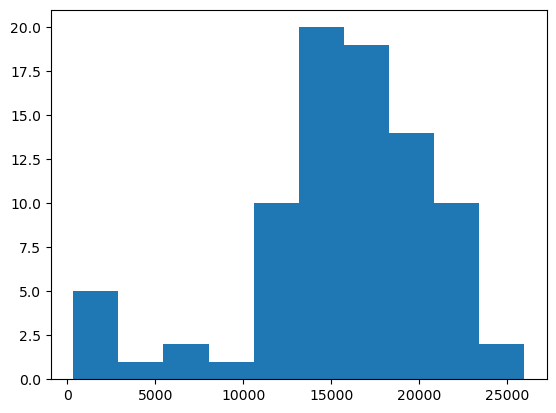

In [189]:
plt.hist(pd.DataFrame(df_split["hgnc_idx"].value_counts()));

In [167]:
dict_folds[list_keys[0]]["dict_splits"][idx]

array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])

In [179]:
0.2**(1/3)

0.5848035476425733

In [178]:
(50**3)**(1/3)

49.999999999999986

In [180]:
(50*0.2)**3 / (50)**3

0.008

In [187]:
df_split, dict_folds = generate_split_dataframe(df_factor, seed=89)

for idx in range(5):
    series0 = df_split[list_keys[0] + "_idx"].isin(dict_folds[list_keys[0]]["dict_splits"][idx])
    series1 = df_split[list_keys[1] + "_idx"].isin(dict_folds[list_keys[1]]["dict_splits"][idx])
    series2 = df_split[list_keys[2] + "_idx"].isin(dict_folds[list_keys[2]]["dict_splits"][idx])
    n = sum(series0 & series1 & series2)
    print(f"{n:,} test; {df_split.shape[0] - n:,} train")
    # print(f"{list_keys[0]}: {sum(series0):,}, {list_keys[1]}: {sum(series1):,}, {list_keys[2]}: {sum(series2):,}\n")

280,331 test; 1,030,262 train
272,451 test; 1,038,142 train
263,586 test; 1,047,007 train
78,975 test; 1,231,618 train
8,636 test; 1,301,957 train


In [ ]:
dict_folds[

In [110]:
df_split.head()

,hgnc,klifs,drug,hgnc_idx,klifs_idx,drug_idx,p(drug|mut)
0,SRC,g.l:7,Bendamustine,0,0,0,0.0
1,PLK2,I:2,Elacestrant,1,1,1,0.0
2,FLT1,b.l:35,Larotrectinib,2,2,2,0.0
3,MAP2K1,αD:54,Gefitinib,3,3,3,0.0
4,EGFR,VII:76,Cu64 Nota-Psmai-Peg-Cy55-C' Dots,4,4,4,0.0


In [102]:
list_n = []
for idx in range(5):
    series0 = df_split[list_keys[0] + "_idx"].isin(dict_folds[list_keys[0]]["dict_splits"][idx])
    series1 = df_split[list_keys[1] + "_idx"].isin(dict_folds[list_keys[1]]["dict_splits"][idx])
    series2 = df_split[list_keys[2] + "_idx"].isin(dict_folds[list_keys[2]]["dict_splits"][idx])
    n = sum(series0 & series1 & series2)
    list_n.append(n)
    print(f"{n} test; {df_split.shape[0] - n} train")

12716 test; 1297877 train
12308 test; 1298285 train
11591 test; 1299002 train
11390 test; 1299203 train
7839 test; 1302754 train


In [74]:
dict_folds["hgnc"]["dict_splits"]

{0: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 1: array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 2: array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 3: array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 4: array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])}

In [25]:
np.array_split(np.array(range(df_factor["hgnc"].nunique())), 5)

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 array([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83])]

In [8]:
df_factor["klifs"].nunique()

85

In [9]:
df_factor["drug"].nunique()

337

In [11]:
df_count = df_factor[["hgnc", "klifs"]].value_counts().unstack()

In [13]:
import matplotlib.pyplot as plt

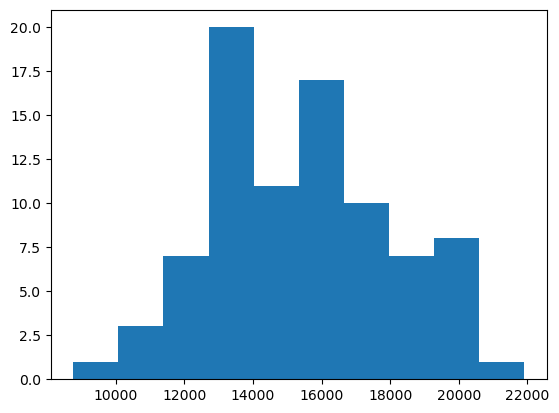

In [15]:
plt.hist(df_count.sum(axis=0));

In [18]:
df_count.sum(axis=1)

hgnc
ABL1      15502.0
ACVR1     14491.0
AKT1      14828.0
AKT2      11795.0
AKT3      19883.0
           ...   
STK40      6066.0
SYK       12132.0
TEK       15165.0
TGFBR1    18872.0
YES1      15502.0
Length: 84, dtype: float64

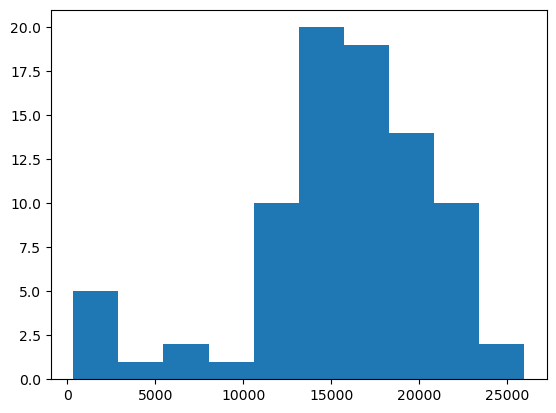

In [16]:
plt.hist(df_count.sum(axis=1));